In [5]:
import networkx as nx
import rdkit
import torch
from IPython.core.display import SVG, display
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, AllChem, rdmolops
from rdkit.Chem.rdMolDescriptors import CalcNumAtomStereoCenters
from torch_geometric.data import DataLoader
from molNet.featurizer.molecule_featurizer import default_molecule_featurizer
from molNet.mol.molecules import Molecule

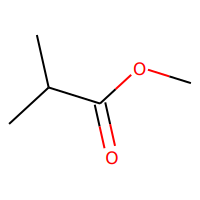

In [6]:
from molNet.nn.models.graph_convolution import GraphFingerprint
m = Molecule(rdkit.Chem.MolFromSmiles("CC(C)(C(=O)OC)"))
display(SVG(m.to_svg()))
mg = m.to_molgraph()

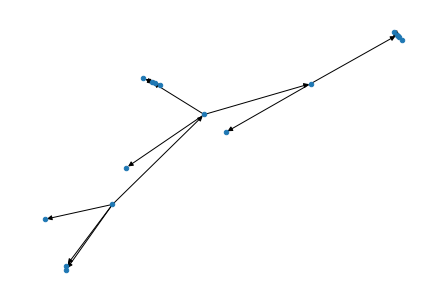

In [7]:
nx.nx_pylab.draw(
    mg,
    pos=nx.nx_pylab.spring_layout(mg,iterations=100,
                                  #scale=10,
                                  k=0.001,
                                  pos=nx.nx_pylab.kamada_kawai_layout(
                                      mg,
                                      pos=nx.nx_pylab.spring_layout(
                                          mg,
                                          iterations=100,
                                          k=0.001,
                                          pos=nx.nx_pylab.circular_layout(mg)
                                      ))
                                  ),
    #with_labels=True,
    node_size=20,
    #labels = {i:mg.mol.GetAtomWithIdx(i).GetSymbol() for i in mg.nodes },
)



In [8]:
mg.featurize(molecule_featurizer=default_molecule_featurizer)

In [11]:
mg.to_graph_input()

Data(
  edge_index=[2, 32],
  graph_features=[18],
  graph_features_titles={
    0="mol_features"
  },
  string_data=[2],
  string_data_titles=[2],
  x=[17, 122],
  y=[0]
)